In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("./data/unc_data.xlsx", sheet_name="PermitDatabaseF_92719")

c:\Users\kendall\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell AK3363 is marked as a date but the serial value 6650632 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
c:\Users\kendall\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell AK8407 is marked as a date but the serial value 6617348 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


In [3]:
df.columns

Index(['Well Abandonment', 'Permit ID', 'OWNER_BUILDER', 'PHONE_H',
       'PHONE_W_C', 'LOT_AREA', 'Subdivision', 'pin', 'PID', 'BMP',
       'Matched_Addr', 'Addr_ZIP', 'zip', 'City', 'XCOORD', 'YCOORD',
       'Lot Number', 'Block Number', 'Directions/ Notes', 'Secondary Notes',
       'Tax Book Number', 'Tax Map Number', 'Tax Parcel Number',
       'Type of Well', 'WellSize_INCH', 'Depth of Well (Feet)',
       'Casing Depth (Feet)', 'Grout Date', 'Yield (GPM)', 'Static Level',
       'CONTRACTOR', 'Company', 'GRID Number', 'Date Permit Issued',
       'Date Permit Approved', 'IP', 'Date of Results',
       'Results Bacteriological (Total Coliform)',
       'Results Bacteriological (Fecal Coliform)', 'Well Use',
       'Date Well Completed', 'Latitude/Longitude',
       'Is this a repair to an existing well? (Yes/No)', 'Method of test',
       'Disinfection Type', 'Amount', 'Water Zones (Feet)',
       'Water Zone Description', 'Outer Casing (Feet)',
       'Outer Casing Thickness'

In [5]:
df = df[["Permit ID",
         "PID",
         "Matched_Addr",
         "Addr_ZIP",
         "City",
         "zip",
         "XCOORD",
         "YCOORD",
         "Depth of Well (Feet)",
         "Date Permit Issued"]]

In [6]:
df.columns = ["id","altid","m_add","add","city","zip","X","Y","depth","date"]

In [7]:
df.head

<bound method NDFrame.head of          id   altid                        m_add  \
0       101  157010       4030 CHESTNUT WOODS DR   
1       102  151734        525 COSTNER SCHOOL RD   
2       103  160247              1630 SHELBY HWY   
3       104  153764         226 RUSTIC HILLS CIR   
4       105  176669        5209 HICKORY GROVE RD   
...     ...     ...                          ...   
8792  13896  306755  3112 GASTON WEBBS CHAPEL RD   
8793  13945  181349                724 RIDDLE ST   
8794  13946  181349                728 RIDDLE ST   
8795  13178  156309        164 LINDERMAN LAKE LN   
8796  13571  169752       906 DALLAS STANLEY HWY   

                                    add           city      zip          X  \
0          4030 CHESTNUT WOODS DR 28086      KINGS MTN  28086.0 -81.328444   
1           525 COSTNER SCHOOL RD 28016  BESSEMER CITY  28016.0 -81.263931   
2                 1630 SHELBY HWY 28021    CHERRYVILLE  28021.0 -81.410357   
3            226 RUSTIC HILLS CIR

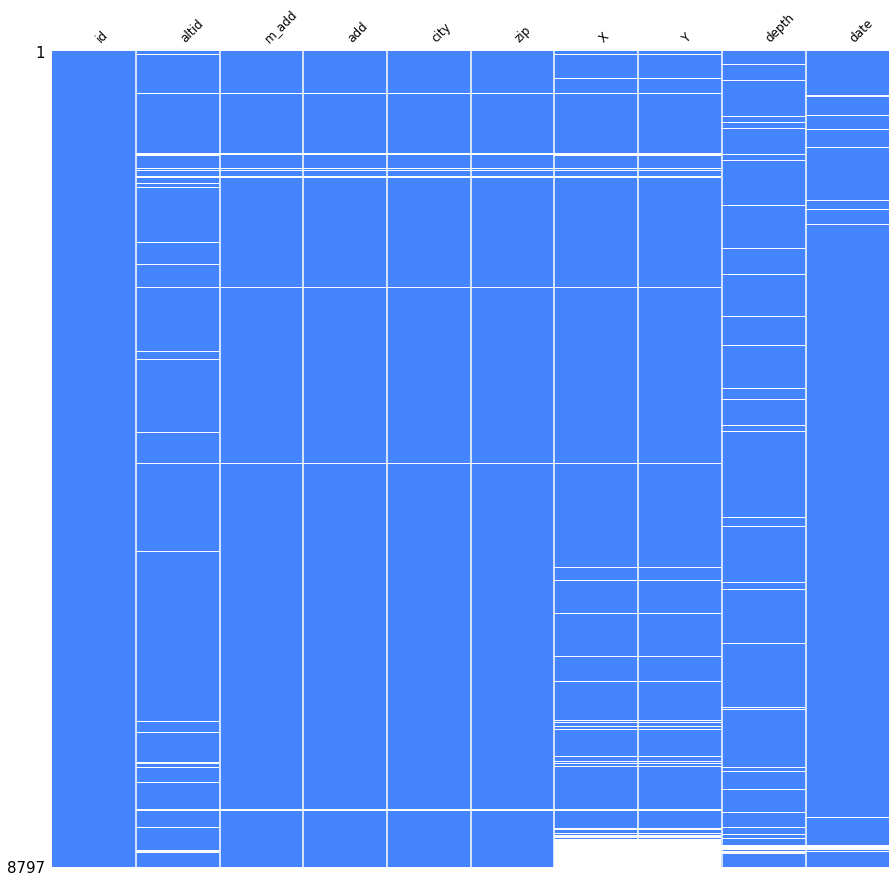

In [8]:
#na_check = df.drop(columns={'plant'})
import missingno as msno
msno.matrix(df, sparkline=False, figsize=(15,15), fontsize=12, color=(0.27, 0.52, 1.0));

In [86]:
df['date'].head()

0    2011-01-03 00:00:00
1    2011-01-04 00:00:00
2    2011-01-04 00:00:00
3    2011-01-04 00:00:00
4    2011-01-20 00:00:00
Name: date, dtype: object

In [87]:
df['date'].tail()

1709    2021-04-05 00:00:00
1710    2021-02-08 00:00:00
1711    2021-02-08 00:00:00
1712    2021-02-15 00:00:00
1713    2020-07-29 00:00:00
Name: date, dtype: object

In [89]:
df['date'] = df['date'].str[:10]

df['date'] = df['date'].replace(regex=['2/1/2021'], value='2021-02-01')

In [92]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')



In [94]:
df['ar'].value_counts()

< 0.005    978
<0.005     410
<0.001     173
0.001       34
0           19
0.002        8
0.006        8
0.004        6
0.007        4
0.009        4
0.001        4
0.003        4
0.007        3
0.012        3
0.008        3
0.018        2
0.024        2
0.01         2
0.006        2
0.011        2
0.003        2
0.008        2
0.019        1
0.004        1
0.043        1
0.002        1
0.011        1
0.042        1
<0.01        1
0.018        1
0.026        1
0.037        1
0.068        1
0.07         1
0.013        1
0.020        1
0.012        1
0.045        1
0.017        1
0.050        1
0.005        1
0.033        1
0.009        1
0.081        1
0.010        1
0.013        1
0.021        1
0.148        1
Name: ar, dtype: int64

In [111]:
li = []
for each in df['ar']:
    
    if each in('<0.001','< 0.005', '<0.005'):
        li.append(0)
    elif each == '<0.01':
        li.append(0)
    else:
        li.append(float(each))


In [119]:
df['ar'] = li

In [127]:
df= df.sort_values(by=['date'])
viz = df.set_index('date')
avg_monthly = viz['ar'].resample('Y').mean()

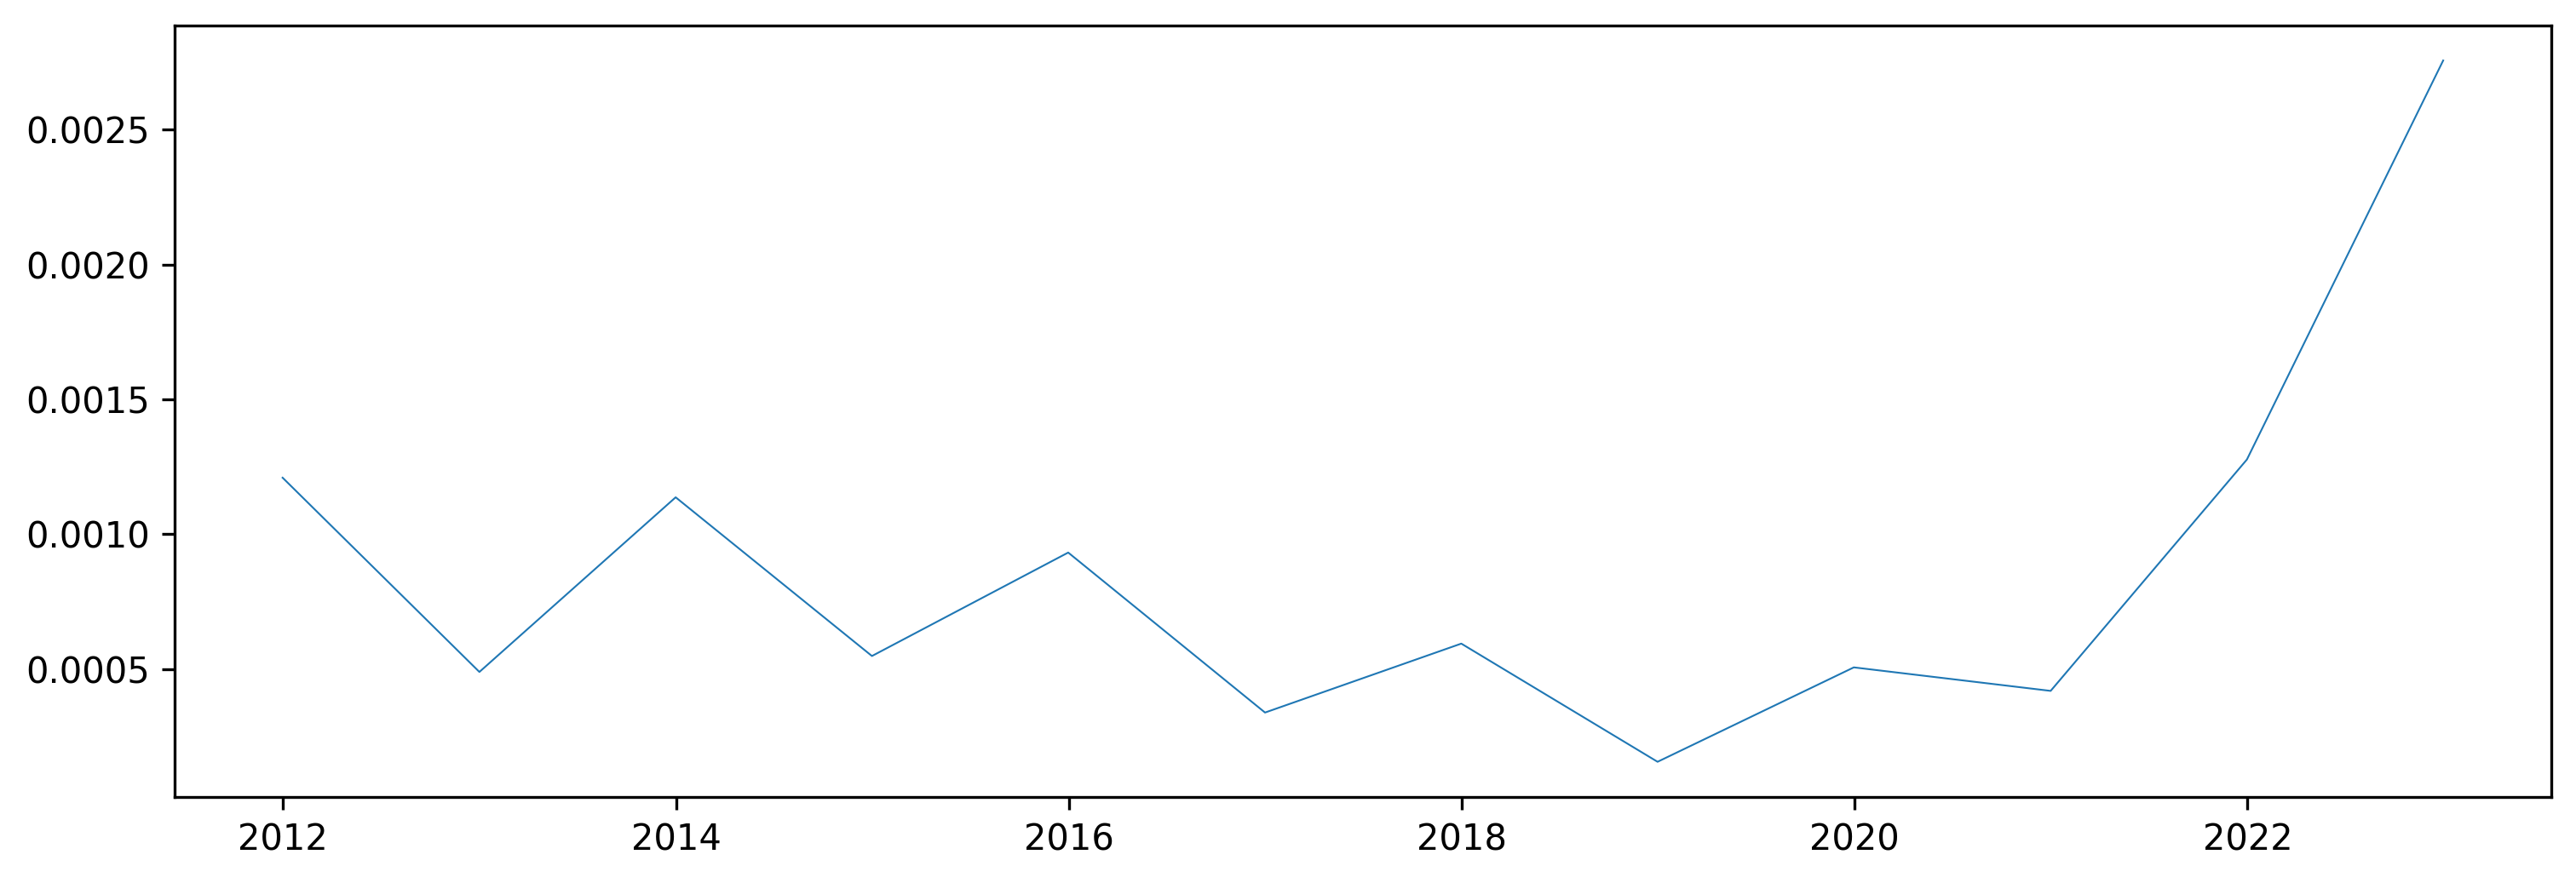

In [128]:
plt.figure(figsize = (12,4), dpi=300)
plt.plot(avg_monthly, linewidth=0.5);

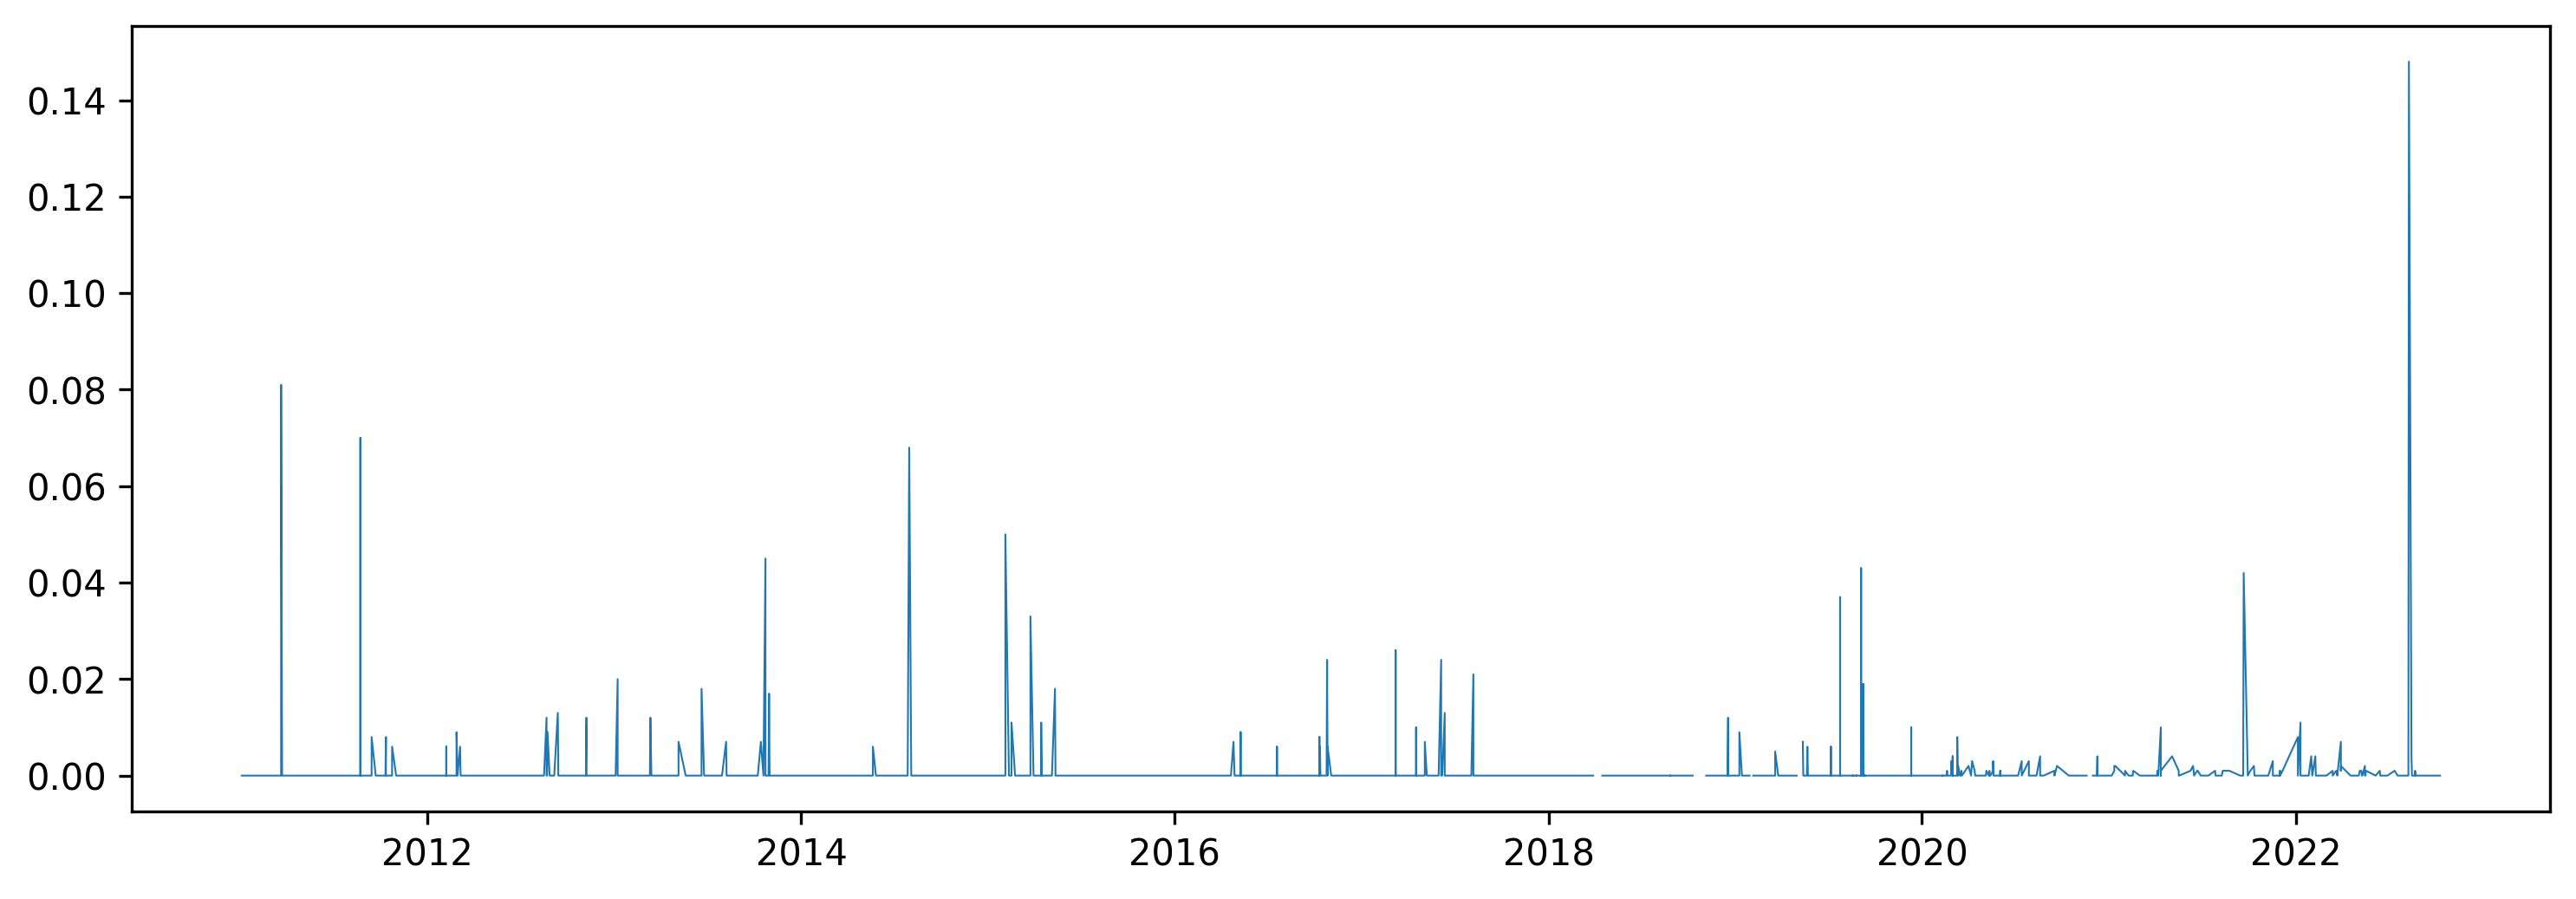

In [129]:
1318

plt.figure(figsize = (12,4), dpi=300)
plt.plot(viz['ar'], linewidth=0.5);

<0.005
0.005-0.01
> 0.01

In [134]:

li = []

for each in df['ar']:
    if each <0.005:
        li.append('0')
    elif 0.005 < each < 0.01:
        li.append('1')
    else: li.append('2')


df['group'] = li

In [136]:
df['group'].value_counts()

0    1641
2      46
1      27
Name: group, dtype: int64

In [138]:
df['year'] = df['date'].dt.year

In [148]:
viz = df[['year','ar']]

viz = viz.groupby(['year']).count()

In [149]:
viz

,ar
year,
2011,148
2012,137
2013,117
2014,135
2015,132
2016,195
2017,170
2018,77
2019,334


In [154]:
viz = df[['year','group']]

viz = pd.get_dummies(viz, columns=['group'])

viz = viz.groupby(['year']).sum()

In [159]:
viz = pd.DataFrame(viz.reset_index())

In [161]:
viz['total'] = (viz['group_0'] + viz['group_1'] + viz['group_2'])

In [166]:
viz['group_0_pct'] = round(((viz['group_0'] / viz['total']) * 100), 2)

viz['group_1_pct'] = round(((viz['group_1'] / viz['total']) * 100), 2)

viz['group_2_pct'] = round(((viz['group_2'] / viz['total']) * 100), 2)

In [170]:
viz.set_index('year', inplace=True)

In [177]:
viz_bar = viz[['group_1_pct','group_2_pct']]

<AxesSubplot:ylabel='year'>

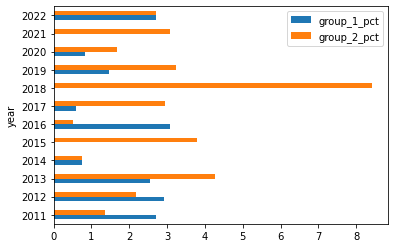

In [178]:
viz_bar.plot(kind='barh')